In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

In [2]:
from pandas import read_csv
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import numpy as np

In [3]:
dataframe = read_csv('Wind_Data_10_daily.csv',
header=0, sep=";", squeeze=True, parse_dates=True)
dataframe

,Year,Month,Day,Hour,Minute,Wind Speed daily mean,Wind Direction daily mean,Wind Speed daily max,Wind Speed daily min
0,2001,1,1,0,0,7.96,140.21,9.80,5.71
1,2001,1,2,0,0,9.29,144.55,20.59,5.18
2,2001,1,3,0,0,20.63,209.30,32.88,7.23
3,2001,1,4,0,0,15.79,190.95,27.13,7.27
4,2001,1,5,0,0,10.03,166.59,14.02,7.85
5,2001,1,6,0,0,9.30,230.02,15.67,2.01
6,2001,1,7,0,0,3.44,202.25,6.35,0.23
7,2001,1,8,0,0,4.29,238.09,8.51,0.35
8,2001,1,9,0,0,7.29,174.06,9.19,3.40
9,2001,1,10,0,0,7.81,155.13,11.11,5.11


In [4]:
dataframe = dataframe[0:300]
dataframe

,Year,Month,Day,Hour,Minute,Wind Speed daily mean,Wind Direction daily mean,Wind Speed daily max,Wind Speed daily min
0,2001,1,1,0,0,7.96,140.21,9.80,5.71
1,2001,1,2,0,0,9.29,144.55,20.59,5.18
2,2001,1,3,0,0,20.63,209.30,32.88,7.23
3,2001,1,4,0,0,15.79,190.95,27.13,7.27
4,2001,1,5,0,0,10.03,166.59,14.02,7.85
5,2001,1,6,0,0,9.30,230.02,15.67,2.01
6,2001,1,7,0,0,3.44,202.25,6.35,0.23
7,2001,1,8,0,0,4.29,238.09,8.51,0.35
8,2001,1,9,0,0,7.29,174.06,9.19,3.40
9,2001,1,10,0,0,7.81,155.13,11.11,5.11


In [5]:
dataframe = dataframe.drop('Wind Direction daily mean', 1)
dataframe = dataframe.drop('Wind Speed daily max', 1)
dataframe = dataframe.drop('Wind Speed daily min', 1)
dataframe = dataframe.drop('Minute', 1)
dataframe = dataframe.drop('Year', 1)
dataframe = dataframe.drop('Month', 1)
dataframe = dataframe.drop('Day', 1)
dataframe = dataframe.drop('Hour', 1)


dataframe


dataset = dataframe.values
dataset.shape

(300, 1)

In [6]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

201 99


In [7]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [8]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [9]:
len(testX)

97

# Multilayer Perceptron Model

In [10]:
import matplotlib.pyplot as plt
import pandas
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [11]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/200
 - 1s - loss: 140.7163
Epoch 2/200
 - 0s - loss: 100.4454
Epoch 3/200
 - 0s - loss: 74.0965
Epoch 4/200
 - 0s - loss: 58.3201
Epoch 5/200
 - 0s - loss: 49.6044
Epoch 6/200
 - 0s - loss: 45.3683
Epoch 7/200
 - 0s - loss: 43.4206
Epoch 8/200
 - 0s - loss: 42.4976
Epoch 9/200
 - 0s - loss: 42.1144
Epoch 10/200
 - 0s - loss: 41.8500
Epoch 11/200
 - 0s - loss: 41.6345
Epoch 12/200
 - 0s - loss: 41.4867
Epoch 13/200
 - 0s - loss: 41.2789
Epoch 14/200
 - 0s - loss: 41.1472
Epoch 15/200
 - 0s - loss: 40.9557
Epoch 16/200
 - 0s - loss: 40.7847
Epoch 17/200
 - 0s - loss: 40.6624
Epoch 18/200
 - 0s - loss: 40.4686
Epoch 19/200
 - 0s - loss: 40.2887
Epoch 20/200
 - 0s - loss: 40.1549
Epoch 21/200
 - 0s - loss: 40.1296
Epoch 22/200
 - 0s - loss: 39.7817
Epoch 23/200
 - 0s - loss: 39.7078
Epoch 24/200
 - 0s - loss: 39.4690
Epoch 25/200
 - 0s - loss: 39.4813
Epoch 26/200

In [12]:
import math
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 33.95 MSE (5.83 RMSE)
Test Score: 15.16 MSE (3.89 RMSE)


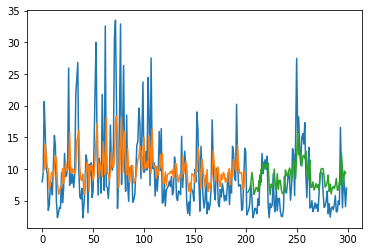

In [13]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# LSTM

In [14]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [15]:
dataframe = read_csv('Wind_Data_10_daily.csv',
header=0, sep=";", squeeze=True, parse_dates=True)
dataframe

,Year,Month,Day,Hour,Minute,Wind Speed daily mean,Wind Direction daily mean,Wind Speed daily max,Wind Speed daily min
0,2001,1,1,0,0,7.96,140.21,9.80,5.71
1,2001,1,2,0,0,9.29,144.55,20.59,5.18
2,2001,1,3,0,0,20.63,209.30,32.88,7.23
3,2001,1,4,0,0,15.79,190.95,27.13,7.27
4,2001,1,5,0,0,10.03,166.59,14.02,7.85
5,2001,1,6,0,0,9.30,230.02,15.67,2.01
6,2001,1,7,0,0,3.44,202.25,6.35,0.23
7,2001,1,8,0,0,4.29,238.09,8.51,0.35
8,2001,1,9,0,0,7.29,174.06,9.19,3.40
9,2001,1,10,0,0,7.81,155.13,11.11,5.11


In [16]:
dataframe = dataframe[0:300]
dataframe

,Year,Month,Day,Hour,Minute,Wind Speed daily mean,Wind Direction daily mean,Wind Speed daily max,Wind Speed daily min
0,2001,1,1,0,0,7.96,140.21,9.80,5.71
1,2001,1,2,0,0,9.29,144.55,20.59,5.18
2,2001,1,3,0,0,20.63,209.30,32.88,7.23
3,2001,1,4,0,0,15.79,190.95,27.13,7.27
4,2001,1,5,0,0,10.03,166.59,14.02,7.85
5,2001,1,6,0,0,9.30,230.02,15.67,2.01
6,2001,1,7,0,0,3.44,202.25,6.35,0.23
7,2001,1,8,0,0,4.29,238.09,8.51,0.35
8,2001,1,9,0,0,7.29,174.06,9.19,3.40
9,2001,1,10,0,0,7.81,155.13,11.11,5.11


In [17]:
dataframe = dataframe.drop('Wind Direction daily mean', 1)
dataframe = dataframe.drop('Wind Speed daily max', 1)
dataframe = dataframe.drop('Wind Speed daily min', 1)
dataframe = dataframe.drop('Minute', 1)
dataframe = dataframe.drop('Year', 1)
dataframe = dataframe.drop('Month', 1)
dataframe = dataframe.drop('Day', 1)
dataframe = dataframe.drop('Hour', 1)


dataframe

,Wind Speed daily mean
0,7.96
1,9.29
2,20.63
3,15.79
4,10.03
5,9.30
6,3.44
7,4.29
8,7.29
9,7.81


In [18]:
dataset = dataframe.values
dataset.shape

(300, 1)

In [19]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [20]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

201 99


In [21]:
import numpy as np
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [22]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [23]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [24]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 1s - loss: 0.0462
Epoch 2/100
 - 1s - loss: 0.0359
Epoch 3/100
 - 1s - loss: 0.0357
Epoch 4/100
 - 1s - loss: 0.0358
Epoch 5/100
 - 1s - loss: 0.0358
Epoch 6/100
 - 1s - loss: 0.0356
Epoch 7/100
 - 1s - loss: 0.0357
Epoch 8/100
 - 1s - loss: 0.0357
Epoch 9/100
 - 1s - loss: 0.0357
Epoch 10/100
 - 1s - loss: 0.0359
Epoch 11/100
 - 1s - loss: 0.0356
Epoch 12/100
 - 1s - loss: 0.0357
Epoch 13/100
 - 1s - loss: 0.0357
Epoch 14/100
 - 1s - loss: 0.0357
Epoch 15/100
 - 1s - loss: 0.0357
Epoch 16/100
 - 1s - loss: 0.0356
Epoch 17/100
 - 1s - loss: 0.0356
Epoch 18/100
 - 1s - loss: 0.0355
Epoch 19/100
 - 1s - loss: 0.0357
Epoch 20/100
 - 1s - loss: 0.0354
Epoch 21/100
 - 1s - loss: 0.0358
Epoch 22/100
 - 1s - loss: 0.0356
Epoch 23/100
 - 1s - loss: 0.0355
Epoch 24/100
 - 1s - loss: 0.0356
Epoch 25/100
 - 1s - loss: 0.0357
Epoch 26/100
 - 1s - loss: 0.0357
Epoch 27/100
 - 1s - loss: 0.0356
Epoch 28/100
 - 1s - loss: 0.0354
Epoch 29/100
 - 1s - loss: 0.0355
Epoch 30/100
 - 1s - lo

In [25]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# calculate mean absolute error
trainScore = mean_absolute_error(trainY[0], trainPredict[:,0])
print('Train Score: %.2f MAE' % (trainScore))
testScore = mean_absolute_error(testY[0], testPredict[:,0])
print('Test Score: %.2f MAE' % (testScore))

Train Score: 5.85 RMSE
Test Score: 4.15 RMSE
Train Score: 4.37 MAE
Test Score: 3.53 MAE


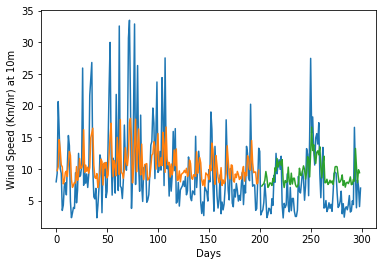

In [26]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.xlabel('Days')
plt.ylabel('Wind Speed (Km/hr) at 10m')
plt.show()